# Material data for OpenPV lab materials

In [1]:
import rdkit,json,os,mols2grid
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
IPythonConsole.molSize = (800, 800)   # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG
IPythonConsole.highlightSubstructs = False
IPythonConsole.drawOptions.minFontSize = 22  # Use minFontSize with underscore
IPythonConsole.drawOptions.maxFontSize = 30  # Use minFontSize with underscore
IPythonConsole.drawOptions.padding = 0.01  # Increase for larger atom labels
IPythonConsole.drawOptions.bondLineWidth = 2  # Optional: make bonds thicker
IPythonConsole.drawOptions.updateAtomPalette({k: (0, 0, 0) for k in DrawingOptions.elemDict.keys()})


In [2]:
# Directories
curr_dir = os.getcwd()
material_data_dir = os.path.join(curr_dir, 'material_data')
chemical_structure_dir = os.path.join(curr_dir, 'chemical_structure')


## Plot one molecule

C(#N)C(=C1/C(/C(C2=CC=CC=C12)=O)=C/C1=CC=2SC=3C=4C=C5C(C=6C=7SC(=CC7SC6C5=CC4C(C3C2S1)(C1=CC=C(C=C1)CCCCCC)C1=CC=C(C=C1)CCCCCC)C=C1C(C2=CC=CC=C2C1=O)=C(C#N)C#N)(C1=CC=C(C=C1)CCCCCC)C1=CC=C(C=C1)CCCCCC)C#N


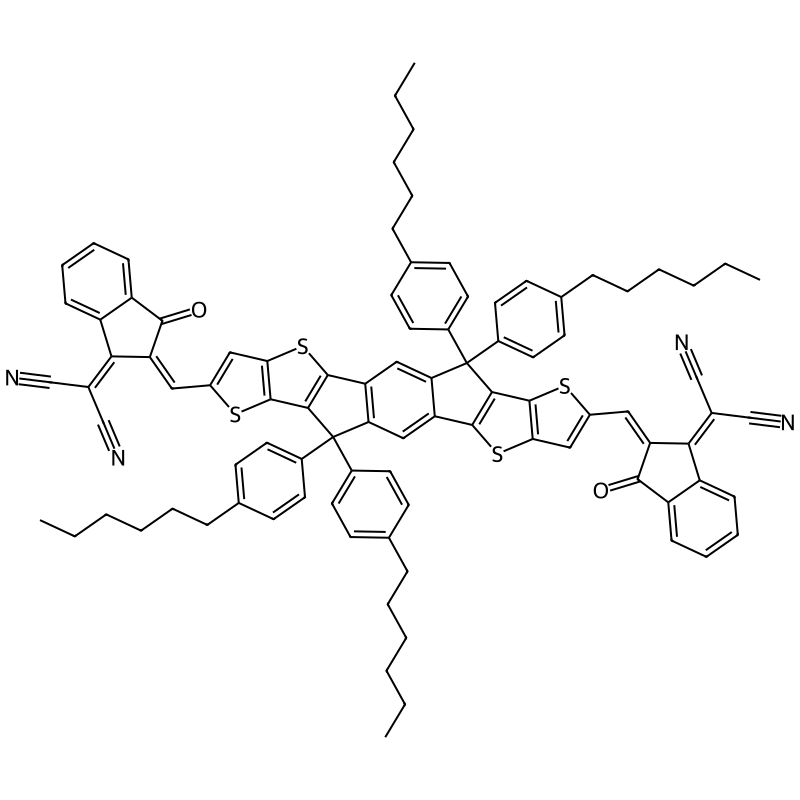

In [3]:
json_file = os.path.join(material_data_dir, 'ITIC.json')
with open(json_file, 'r') as f:
    data = json.load(f)

smiles = data['smiles']
print(smiles)
mol = Chem.MolFromSmiles(smiles)
display(mol)

# Get the structure of all materials

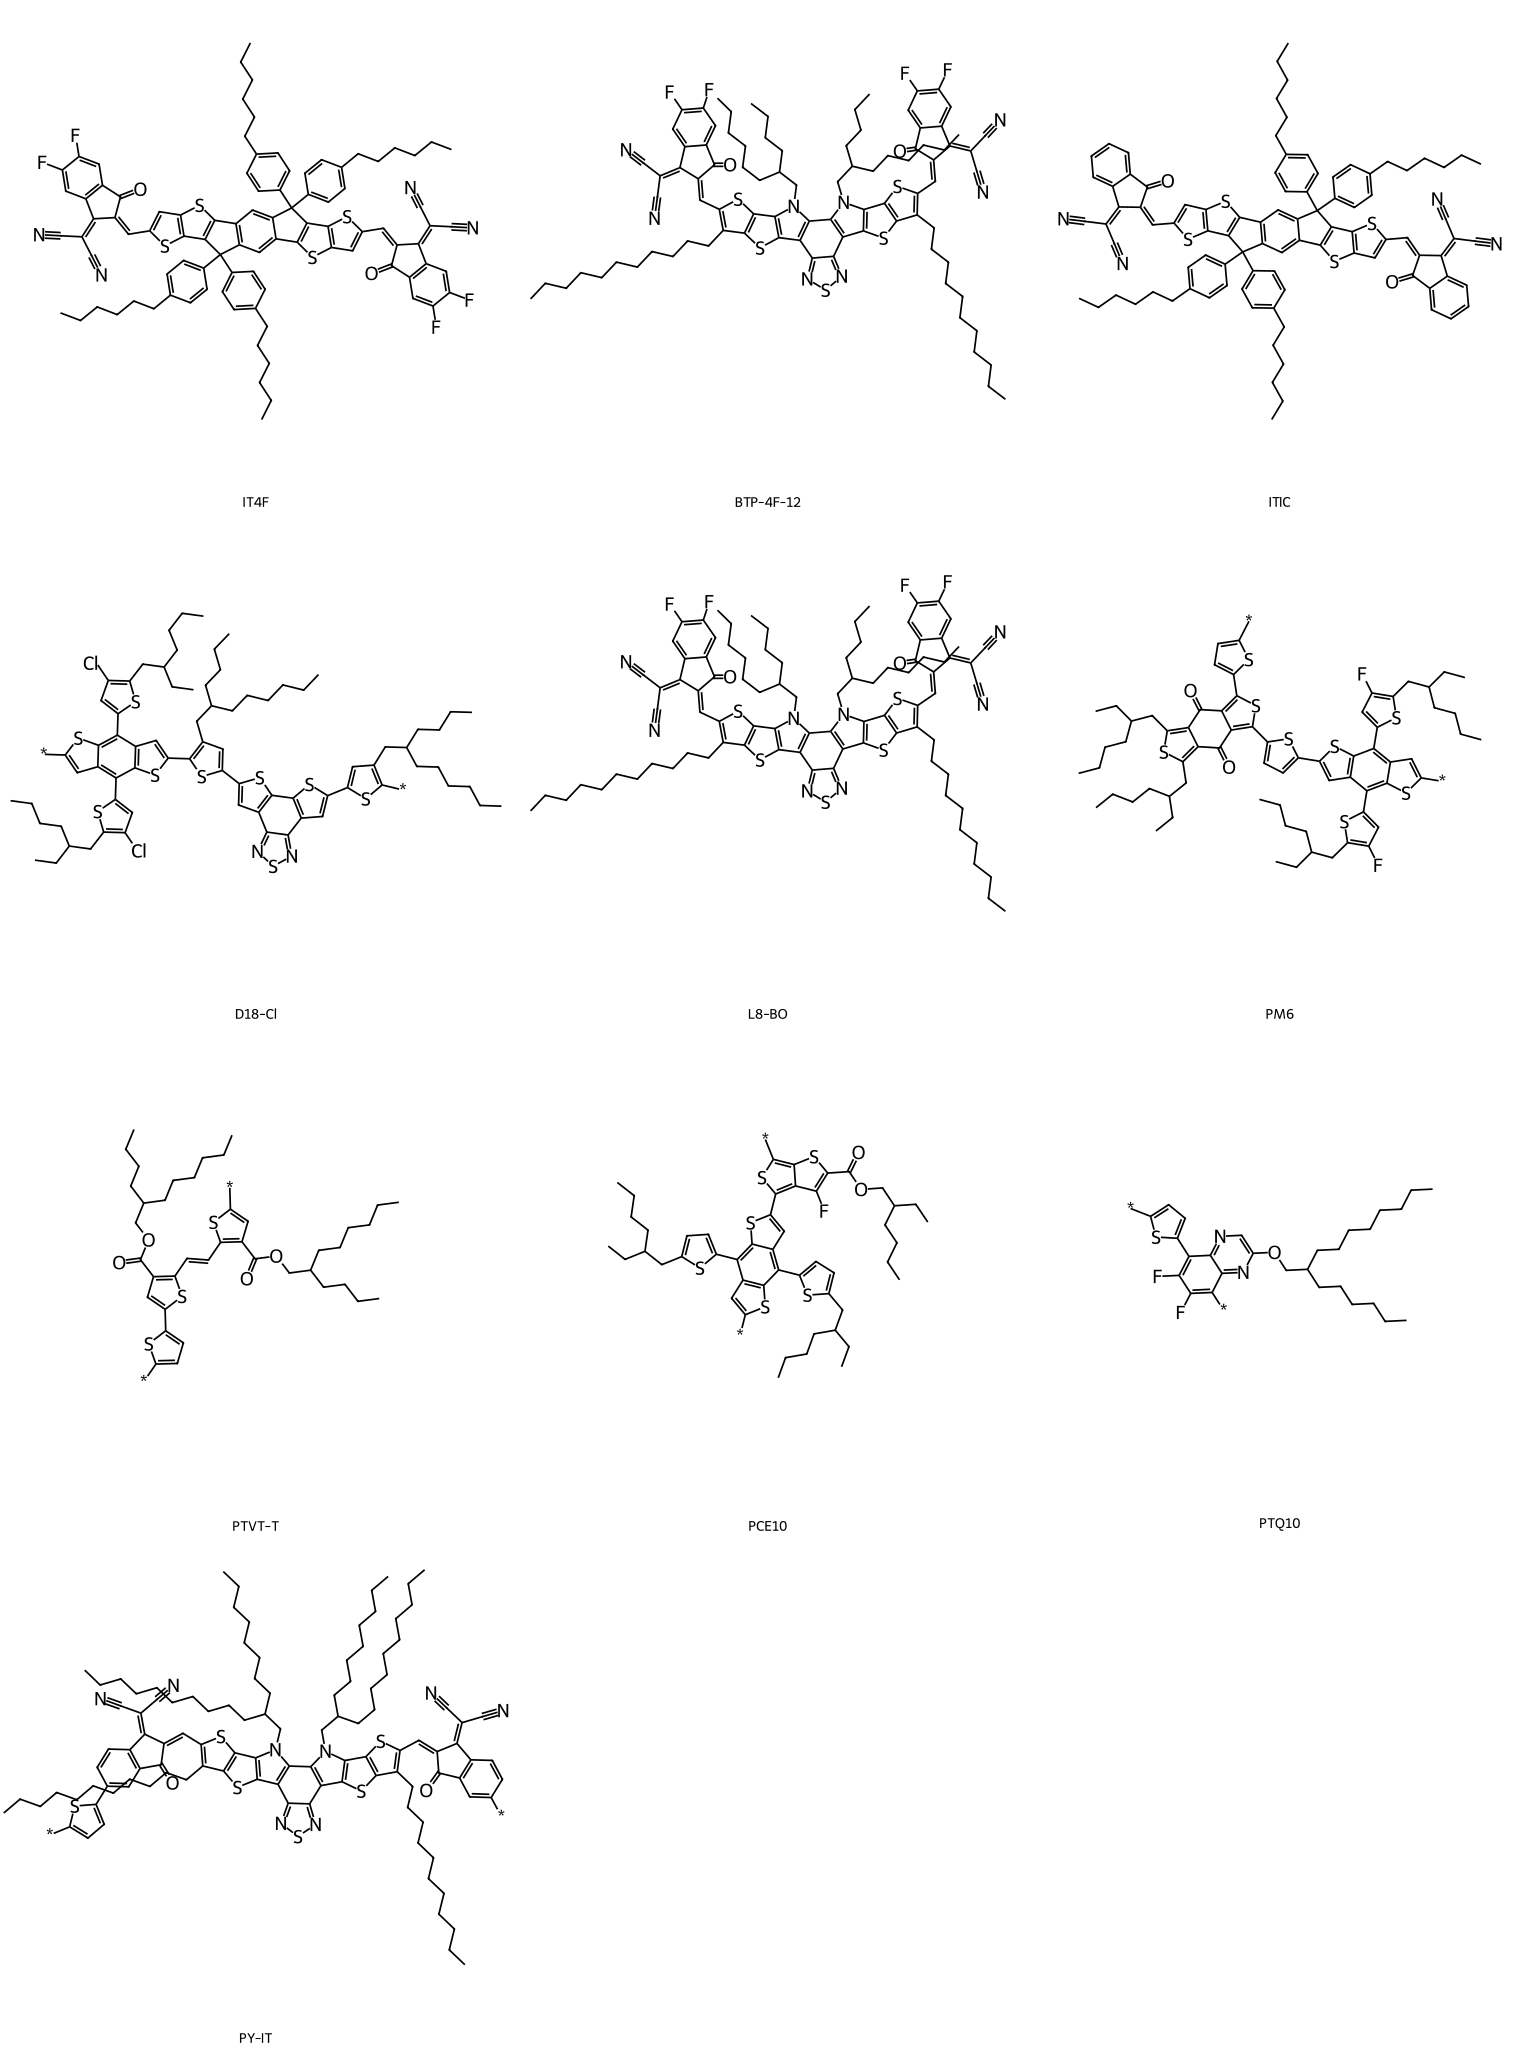

In [4]:
# list of json files in material_data_dir
json_files = [f for f in os.listdir(material_data_dir) if f.endswith('.json')]

# Create a list of molecules from the JSON files
molecules = []
names = []
# Loop through each JSON file and extract the 'smiles' field
for json_file in json_files:
    with open(os.path.join(material_data_dir, json_file), 'r') as f:
        data = json.load(f)
    smiles = data.get('smiles')
    if smiles:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            names.append(data.get('name', 'Unknown'))
            molecules.append(mol)

# Display the molecules
# for mol in molecules:
#     display(mol)
rdkit.Chem.Draw.MolsToGridImage(molecules,molsPerRow=3,useSVG=True,subImgSize=(600, 600),legends=names)
# mols2grid.display(molecules)

# Calculate the Mordred descriptors for all materials

In [5]:
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
dfm = calc.pandas(molecules) # big pandas table with all the mordred features
print(dfm)

100%|██████████| 10/10 [00:02<00:00,  3.50it/s]

         ABC      ABCGG  nAcid  nBase     SpAbs_A   SpMax_A  SpDiam_A  \
0  85.459927  54.921542      0      0  143.543945  2.769440  5.342558   
1  84.053308  58.101887      0      0  142.216551  2.740457  5.227717   
2  82.274821  52.682889      0      0  139.585627  2.769425  5.342543   
3  71.006102  49.497442      0      0  118.830520  2.629969  5.116446   
4  84.053308  58.101887      0      0  142.216551  2.740457  5.227717   
5  64.072933  46.980308      0      0  106.779606  2.644320  5.131832   
6  36.297804  28.415414      0      0   61.997727  2.448547  4.714627   
7  46.500005  35.033289      0      0   77.915619  2.632148  5.118013   
8  27.024536  20.629259      0      0   46.107325  2.523666  5.032379   
9  98.017105  64.668124      0      0  167.258567  2.740444  5.227726   

       SpAD_A   SpMAD_A   LogEE_A  ...      SRW10      TSRW10           MW  \
0  143.543945  1.329111  5.632047  ...  11.896588  171.461652  1498.494375   
1  142.216551  1.304739  5.619178  ...  